In [9]:
from fastai.vision.all import *


path = Path("D:/AI/xray")

# dest = 'D:/AI/xray/nor/IM-0115-0001.jpg'

# im = Image.open(dest)

In [10]:
xray_types = 'nor', 'pne'

In [11]:
# fns = get_image_files(path)
# fns

In [12]:
xray = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),)

In [13]:
# dls = xray.dataloaders(path, bs= 4, num_workers=0)

In [14]:
xray = xray.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = xray.dataloaders(path, num_workers=0)

In [15]:

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.254665,1.218428,0.475000,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.985755,1.749802,0.525000,00:23
1,0.833223,1.415941,0.475000,00:20
2,0.650046,0.654182,0.225000,00:20
3,0.526999,0.354292,0.100000,00:21


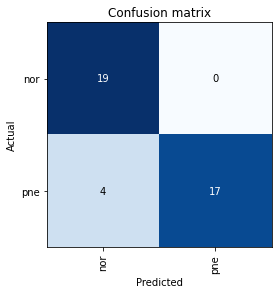

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
# interp.plot_top_losses(5, nrows=1)

In [18]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [20]:
learn_inf = load_learner(path/'export.pkl')

In [21]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()



In [22]:
from fastbook import *
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [23]:
btn_upload = SimpleNamespace(data = ['D:/AI/xray/nor/IM-0115-0001.jpg'])

In [24]:
img = PILImage.create(btn_upload.data[-1])

In [25]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [26]:
pred,pred_idx,probs = learn_inf.predict(img)

In [27]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: nor; Probability: 1.0000')

In [28]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [29]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [30]:
btn_upload = widgets.FileUpload()

In [31]:
VBox([widgets.Label('Select your xray!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [33]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.


  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: C:\Users\soler\.jupyter
    - Validating...
      voila 0.2.4 ok
Enabling: —sys-prefix
- Writing config: C:\Users\soler\.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
